MBAN 6110 S: Assignment 2 - Regression and Regularization
- Submitted By: Mahin Bindra
- Student ID: 220089330

In [1]:
# Import all necessary libraries / modules that will be required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Create variable 'house' and read the csv data file onto that variable using pandas object
house = pd.read_csv('/Users/mahinbindra/Downloads/kc_house_data.csv')

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [128]:
# Calculate various parameters and statistical values about the data set
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.120700e+04,21538.000000,21613.000000,21365.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21477.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.068452e+05,3.359458,2.114757,2036.442733,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.641337,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,2.593258e+05,0.875472,0.770163,821.108969,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.127267,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.470000e+05,3.000000,2.250000,1900.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.273750e+05,4.000000,2.500000,2520.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,1.640000e+06,6.000000,8.000000,4830.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Gather further information about data type of each attribute and # null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

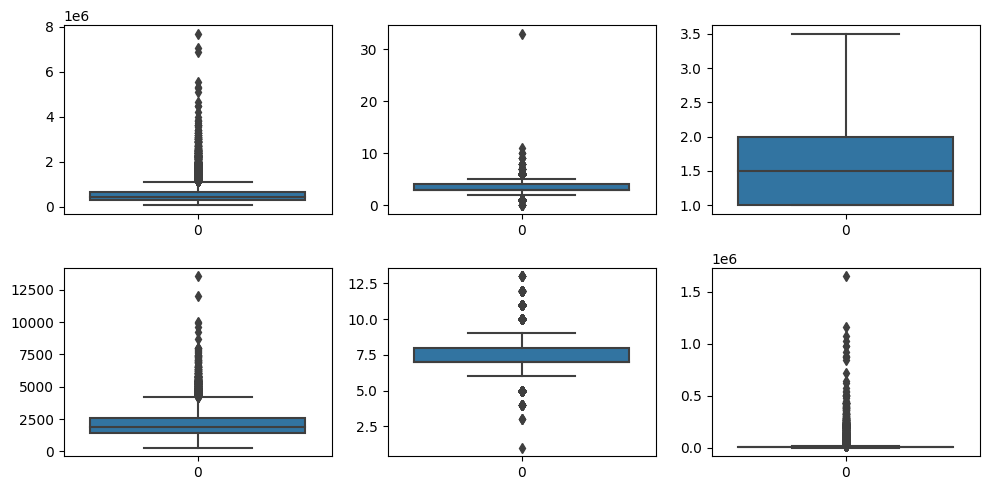

In [7]:
# Create boxplots for various parameters to assess the presence of outliers
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(house['floors'], ax = axs[0,2])
plt4 = sns.boxplot(house['sqft_living'], ax = axs[1,0])
plt5 = sns.boxplot(house['grade'], ax = axs[1,1])
plt6 = sns.boxplot(house['sqft_lot'], ax = axs[1,2])
plt.tight_layout()

In [11]:
# Define function to remove outliers using outliers, with a threshold of 3
def remove_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    outliers = np.where(z_scores > threshold)
    clean_data = data[~np.isin(range(len(data)), outliers)]
    return clean_data
data = house['price']
house['price'] = remove_outliers_zscore(data)

In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21207 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

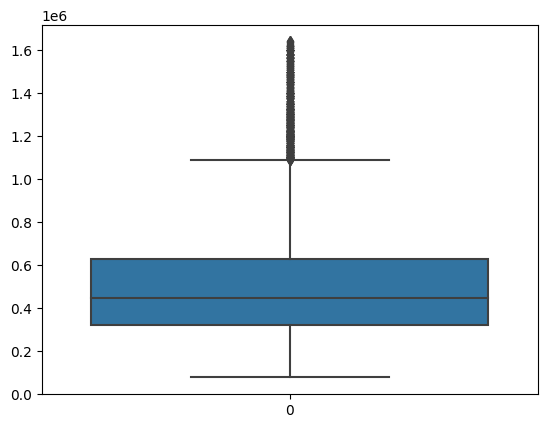

In [15]:
# Create boxplot for price column post removal of outliers
sns.boxplot(house['price'])

In [16]:
# Remove outliers within 'sqft_living' column using similar z-score function
data = house['sqft_living']
house['sqft_living'] = remove_outliers_zscore(data)

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21207 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21365 non-null  float64
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

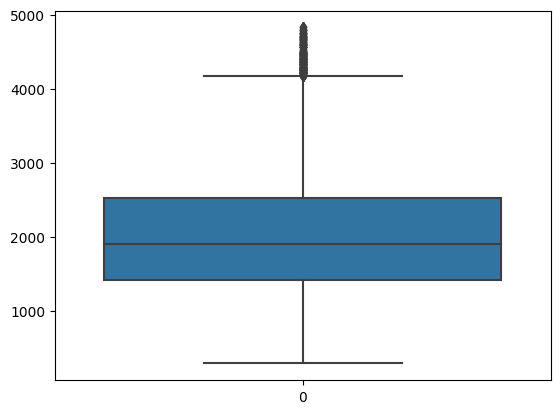

In [18]:
# Create boxplot for sqft_living column post removal of outliers
sns.boxplot(house['sqft_living'])

In [19]:
# Remove outliers within 'bedrooms' column using similar z-score function
data = house['bedrooms']
house['bedrooms'] = remove_outliers_zscore(data)

<Axes: >

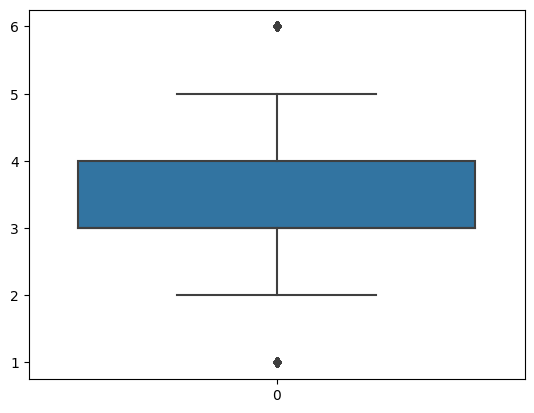

In [20]:
# Create boxplot for bedrooms column post removal of outliers
sns.boxplot(house['bedrooms'])

In [22]:
# Remove outliers within 'grade' column using similar z-score function
data = house['grade']
house['grade'] = remove_outliers_zscore(data)

<Axes: >

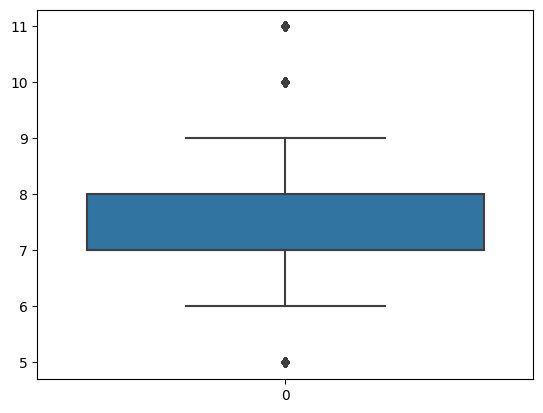

In [23]:
# Create boxplot for grade column post removal of outliers
sns.boxplot(house['grade'])

In [24]:
house_2 = house.copy()

In [29]:
# Drop rows with any null values for a comprehensive dataset
house_2.dropna(how = 'any', inplace=True)

In [30]:
house_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20974 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20974 non-null  int64  
 1   date           20974 non-null  object 
 2   price          20974 non-null  float64
 3   bedrooms       20974 non-null  float64
 4   bathrooms      20974 non-null  float64
 5   sqft_living    20974 non-null  float64
 6   sqft_lot       20974 non-null  int64  
 7   floors         20974 non-null  float64
 8   waterfront     20974 non-null  int64  
 9   view           20974 non-null  int64  
 10  condition      20974 non-null  int64  
 11  grade          20974 non-null  float64
 12  sqft_above     20974 non-null  int64  
 13  sqft_basement  20974 non-null  int64  
 14  yr_built       20974 non-null  int64  
 15  yr_renovated   20974 non-null  int64  
 16  zipcode        20974 non-null  int64  
 17  lat            20974 non-null  float64
 18  long       

In [31]:
# Create OLS regression model
results = ols("price ~ bedrooms + floors + sqft_living", data=house_2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     5268.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:52:43   Log-Likelihood:            -2.8475e+05
No. Observations:               20974   AIC:                         5.695e+05
Df Residuals:                   20970   BIC:                         5.695e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.386e+05   5988.627     23.148      

In [33]:
house_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7.0,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,7.0,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,8.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
'y_hat = -3.6e+04bedrooms + 2.108e+04floors + 225.2166sqft_living'

'y_hat = -3.6e+04bedrooms + 2.108e+04floors + 225.2166sqft_living'

In [34]:
# Calculate y_hat value using attributes considered in OLS equation
1.386e+05 + (-3.6e+04*3) + (2.108e+04*1) + (225.2166*1180)

317435.588

In [36]:
# Calculate predicted values using OLS results
pred_vals = results.predict(house_2[['bedrooms','floors', 'sqft_living']])
pred_vals

0        317468.005797
1        651595.584085
2        261124.800393
3        457141.346750
4        430076.297080
             ...      
21608    438446.866735
21609    557043.679169
21610    338505.474555
21611    433135.498995
21612    338505.474555
Length: 20974, dtype: float64

In [37]:
# Residual analysis of price to assess errors
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house_2['price']], axis = 1)
res

,y_hat,price
0,317468.005797,221900.0
1,651595.584085,538000.0
2,261124.800393,180000.0
3,457141.346750,604000.0
4,430076.297080,510000.0
...,...,...
21608,438446.866735,360000.0
21609,557043.679169,400000.0
21610,338505.474555,402101.0
21611,433135.498995,400000.0


In [38]:
res['error'] = res['y_hat'] - res['price']

In [39]:
res.head(1)

,y_hat,price,error
0,317468.005797,221900.0,95568.005797


In [40]:
res['sq_error'] = res['error']**2

In [41]:
# Calculate Mean Squared Error (MSE) for OLS regression model
np.sqrt(res['sq_error'].mean())

190455.03815980462

In [42]:
house_2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.097400e+04,2.097400e+04,20974.000000,20974.000000,20974.000000,2.097400e+04,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000,20974.000000
mean,4.593866e+09,5.021984e+05,3.339420,2.074092,2009.161152,1.451590e+04,1.484290,0.004291,0.199390,3.409888,7.588967,1733.429913,275.731239,1970.855011,80.021074,98078.474683,47.558883,-122.214408,1948.851674,12369.053304
std,2.879263e+09,2.522211e+05,0.862962,0.716064,789.323068,3.926075e+04,0.538202,0.065367,0.696496,0.649343,1.072659,738.456684,415.761411,29.271516,391.548292,53.423643,0.139682,0.141294,636.505153,25505.475124
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125403e+09,3.199900e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.466300,-122.330000,1480.000000,5070.250000
50%,3.905020e+09,4.450000e+05,3.000000,2.250000,1890.000000,7.525000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.569900,-122.233000,1820.000000,7560.000000
75%,7.334602e+09,6.250000e+05,4.000000,2.500000,2490.000000,1.039900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.679000,-122.125000,2319.000000,9935.750000
max,9.900000e+09,1.640000e+06,6.000000,5.250000,4820.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,4800.000000,2300.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


(array([  23.,   93.,  175.,  439., 1127., 3666., 7482., 6500., 1358.,
         111.]),
 array([-1053947.65752855,  -892976.52544169,  -732005.39335482,
         -571034.26126796,  -410063.1291811 ,  -249091.99709423,
          -88120.86500737,    72850.2670795 ,   233821.39916636,
          394792.53125322,   555763.66334009]),
 <BarContainer object of 10 artists>)

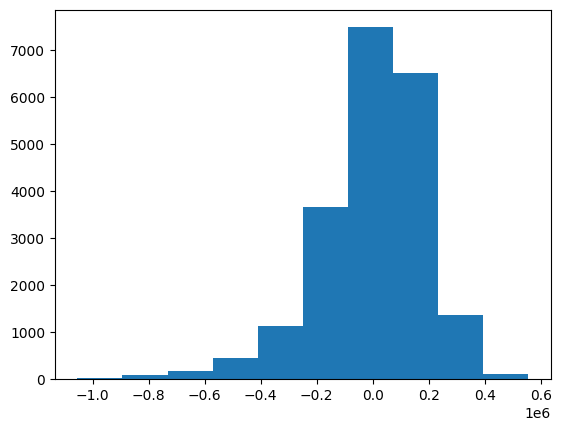

In [43]:
plt.hist(res['error'])

(array([1718., 6622., 5429., 3451., 1911.,  933.,  349.,  293.,  162.,
         106.]),
 array([  78000.,  234200.,  390400.,  546600.,  702800.,  859000.,
        1015200., 1171400., 1327600., 1483800., 1640000.]),
 <BarContainer object of 10 artists>)

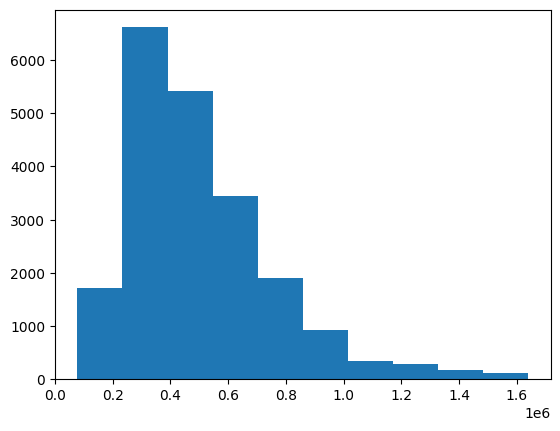

In [44]:
plt.hist(house_2['price'])

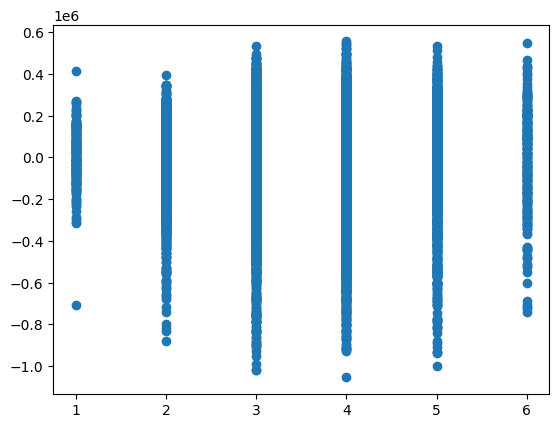

In [46]:
plt.scatter(house_2['bedrooms'],res['error'])

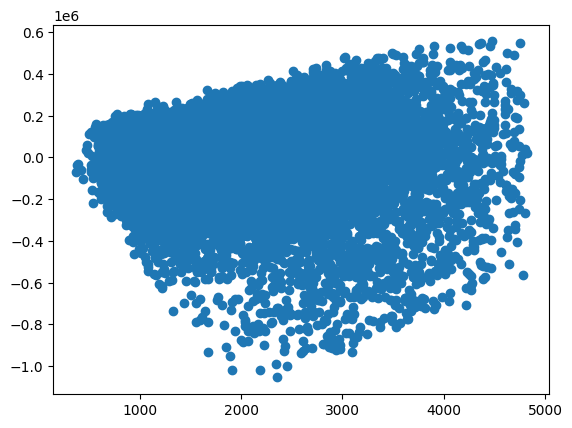

In [47]:
plt.scatter(house_2['sqft_living'],res['error'])

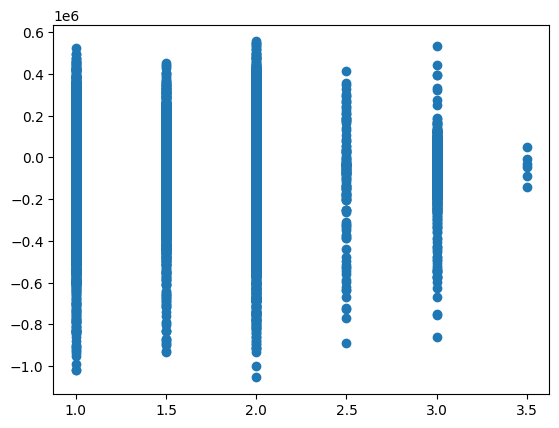

In [48]:
plt.scatter(house_2['floors'],res['error'])

((array([-3.98992297, -3.77433673, -3.65639367, ...,  3.65639367,
          3.77433673,  3.98992297]),
  array([-1053947.65752855, -1020063.24581036, -1018123.88892924, ...,
           547580.95373533,   547989.83925767,   555763.66334009])),
 (185579.5444257174, -1.0041516895320819e-09, 0.9742225723586081))

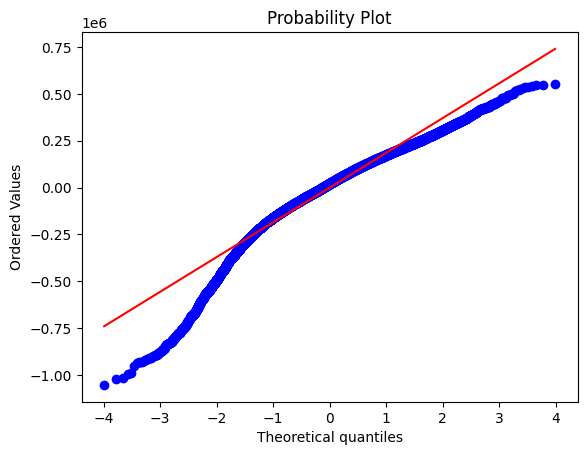

In [49]:
# Calculate probability plot to assess probability distribution
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [50]:
# Obtain influence measures associated with our model
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.003041     -0.000925    0.001916         0.002746  7.499201e-06  \
1          -0.000617      0.004062   -0.002887        -0.003725  1.294232e-05   
2          -0.005252      0.002304    0.001233         0.001835  9.126638e-06   
3           0.000145      0.005078   -0.004694        -0.001828  1.978498e-05   
4           0.002768     -0.000650   -0.002365         0.000124  3.929597e-06   
...              ...           ...         ...              ...           ...   
21608       0.002719     -0.000421   -0.009203         0.004153  2.394910e-05   
21609       0.004910     -0.004112   -0.005238         0.002188  1.979440e-05   
21610       0.002031     -0.002113    0.003309        -0.001918  7.482502e-06   
21611       0.000001      0.000040   -0.001456         0.000861  9.913304e-07   
21612      -0.000431      0.000449   -0.000703         0.000407  3.374531e-07   

       standard_resid  hat_

In [51]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_floors,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003041,-0.000925,0.001916,0.002746,7.499201e-06,-0.501770,0.000119,-0.005477,-0.501761,-0.005477
1,-0.000617,0.004062,-0.002887,-0.003725,1.294232e-05,-0.596430,0.000146,-0.007195,-0.596420,-0.007195
2,-0.005252,0.002304,0.001233,0.001835,9.126638e-06,-0.425955,0.000201,-0.006042,-0.425946,-0.006042
3,0.000145,0.005078,-0.004694,-0.001828,1.978498e-05,0.771071,0.000133,0.008896,0.771064,0.008896
4,0.002768,-0.000650,-0.002365,0.000124,3.929597e-06,0.419625,0.000089,0.003965,0.419617,0.003965
...,...,...,...,...,...,...,...,...,...,...
21608,0.002719,-0.000421,-0.009203,0.004153,2.394910e-05,-0.411969,0.000564,-0.009788,-0.411961,-0.009787
21609,0.004910,-0.004112,-0.005238,0.002188,1.979440e-05,-0.824540,0.000116,-0.008898,-0.824534,-0.008898
21610,0.002031,-0.002113,0.003309,-0.001918,7.482502e-06,0.333927,0.000268,0.005471,0.333919,0.005471
21611,0.000001,0.000040,-0.001456,0.000861,9.913304e-07,-0.173975,0.000131,-0.001991,-0.173971,-0.001991


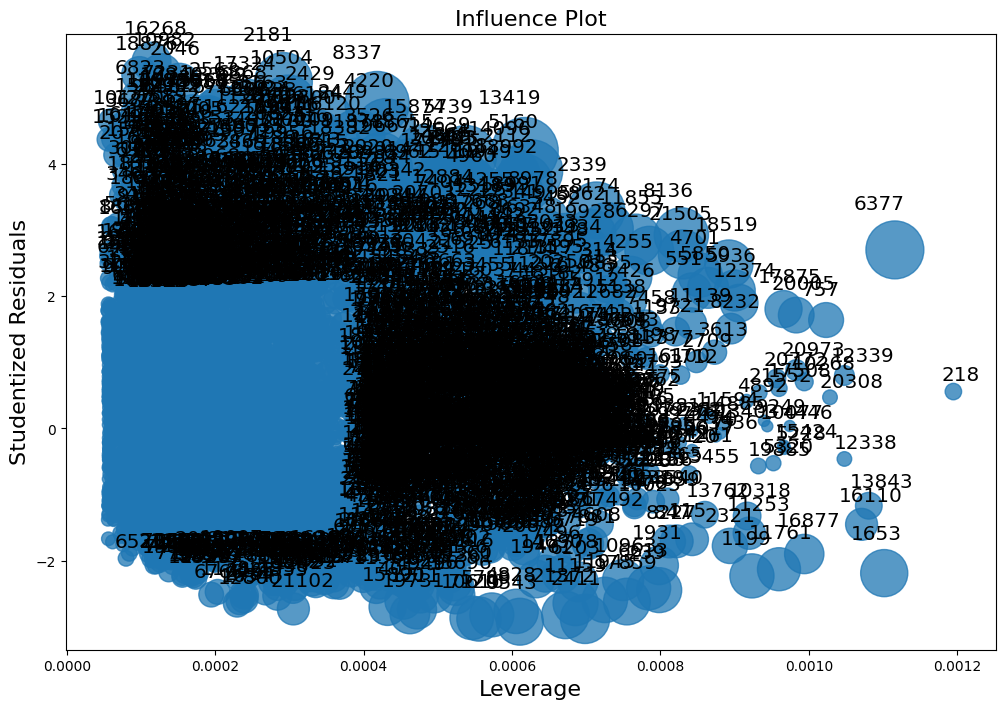

In [52]:
# Build influence plot to assess presence of outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [53]:
house_3 = house_2.copy()

In [54]:
# Drop outlier
house_3.drop(6377, inplace=True)

In [55]:
# Re-create OLS regression model post removal of outliers
results = ols("price ~ bedrooms + floors + sqft_living", data=house_3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     5272.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:12:45   Log-Likelihood:            -2.8473e+05
No. Observations:               20973   AIC:                         5.695e+05
Df Residuals:                   20969   BIC:                         5.695e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.39e+05   5988.970     23.201      

In [57]:
house_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20973 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20973 non-null  int64  
 1   date           20973 non-null  object 
 2   price          20973 non-null  float64
 3   bedrooms       20973 non-null  float64
 4   bathrooms      20973 non-null  float64
 5   sqft_living    20973 non-null  float64
 6   sqft_lot       20973 non-null  int64  
 7   floors         20973 non-null  float64
 8   waterfront     20973 non-null  int64  
 9   view           20973 non-null  int64  
 10  condition      20973 non-null  int64  
 11  grade          20973 non-null  float64
 12  sqft_above     20973 non-null  int64  
 13  sqft_basement  20973 non-null  int64  
 14  yr_built       20973 non-null  int64  
 15  yr_renovated   20973 non-null  int64  
 16  zipcode        20973 non-null  int64  
 17  lat            20973 non-null  float64
 18  long       

In [56]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.003038     -0.000926    0.001915         0.002746  7.493573e-06  \
1          -0.000619      0.004066   -0.002888        -0.003729  1.296456e-05   
2          -0.005256      0.002306    0.001235         0.001834  9.139944e-06   
3           0.000142      0.005084   -0.004696        -0.001833  1.982382e-05   
4           0.002768     -0.000650   -0.002365         0.000125  3.929034e-06   
...              ...           ...         ...              ...           ...   
21608       0.002716     -0.000424   -0.009187         0.004147  2.386597e-05   
21609       0.004910     -0.004114   -0.005237         0.002191  1.977887e-05   
21610       0.002031     -0.002113    0.003309        -0.001917  7.483197e-06   
21611       0.000002      0.000039   -0.001453         0.000860  9.876524e-07   
21612      -0.000431      0.000449   -0.000703         0.000407  3.378828e-07   

       standard_resid  hat_

In [58]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_floors,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.003038,-0.000926,0.001915,0.002746,7.493573e-06,-0.501558,0.000119,-0.005475,-0.501549,-0.005475
1,-0.000619,0.004066,-0.002888,-0.003729,1.296456e-05,-0.596901,0.000146,-0.007201,-0.596892,-0.007201
2,-0.005256,0.002306,0.001235,0.001834,9.139944e-06,-0.426257,0.000201,-0.006046,-0.426249,-0.006046
3,0.000142,0.005084,-0.004696,-0.001833,1.982382e-05,0.771716,0.000133,0.008905,0.771709,0.008905
4,0.002768,-0.000650,-0.002365,0.000125,3.929034e-06,0.419592,0.000089,0.003964,0.419583,0.003964
...,...,...,...,...,...,...,...,...,...,...
21608,0.002716,-0.000424,-0.009187,0.004147,2.386597e-05,-0.411220,0.000564,-0.009771,-0.411212,-0.009770
21609,0.004910,-0.004114,-0.005237,0.002191,1.977887e-05,-0.824007,0.000117,-0.008895,-0.824000,-0.008895
21610,0.002031,-0.002113,0.003309,-0.001917,7.483197e-06,0.333942,0.000268,0.005471,0.333935,0.005471
21611,0.000002,0.000039,-0.001453,0.000860,9.876524e-07,-0.173641,0.000131,-0.001988,-0.173637,-0.001988


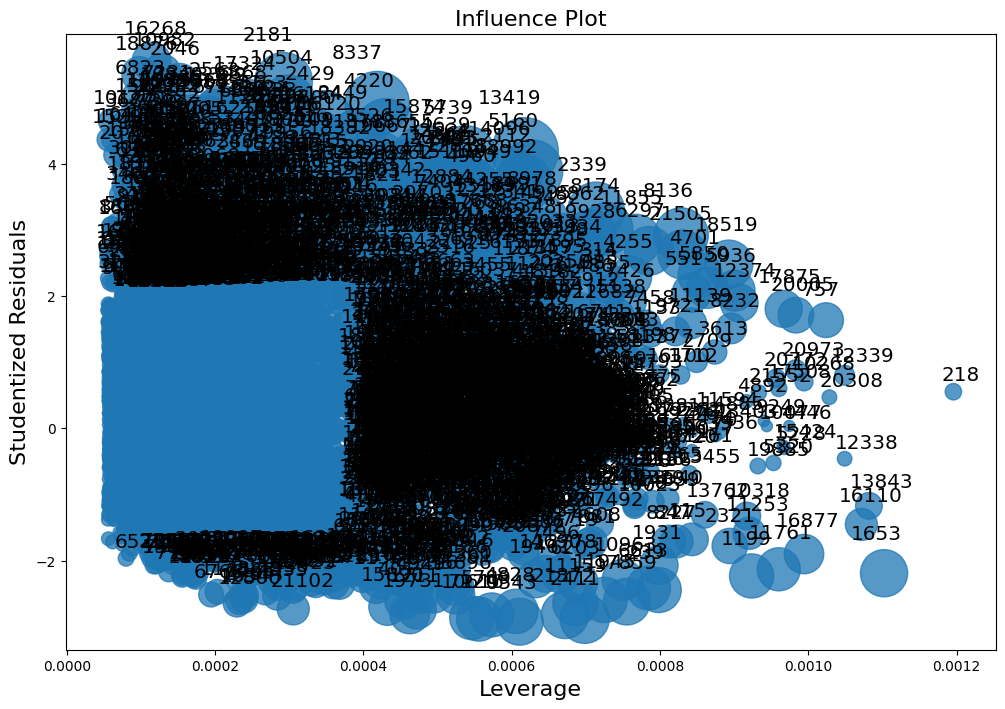

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [60]:
house_4 = house_3.copy()

In [61]:
# Create dummy variables for 'view' column
dummies_view = pd.get_dummies(house_4.view, dtype = int)
dummies_view.rename(columns={0:'worst view', 1:'bad view', 2:'neutral view', 3:'good view', 4:'best view'}, inplace = True)
house_4 = pd.concat([house_4,dummies_view], axis = 1)
house_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,worst view,bad view,neutral view,good view,best view
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,1,0,0,0,0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,1,0,0,0,0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,1,0,0,0,0
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


In [62]:
# Re-create OLS regression model after incorporating 'view' into the equation
results = ols("price ~ bedrooms + floors + sqft_living + view", data=house_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4484.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:21:27   Log-Likelihood:            -2.8414e+05
No. Observations:               20973   AIC:                         5.683e+05
Df Residuals:                   20968   BIC:                         5.683e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.289e+05   5830.522     22.113      

In [66]:
# Create dummy variables for 'grade' column
dummies_grade = pd.get_dummies(house_4.grade, dtype = int)
dummies_grade.rename(columns={1:'worst grade', 3:'terrible grade', 4:'bad grade', 5:'ok grade', 6:'neutral grade', 7:'good grade', 8:'better grade', 9:'great grade', 10:'excellent grade', 11: 'outstanding grade', 12:'best grade', 13:'phenomenal grade'}, inplace = True)
house_4 = pd.concat([house_4,dummies_grade], axis = 1)
house_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,bad condition,decent condition,good condition,ok grade,neutral grade,good grade,better grade,great grade,excellent grade,outstanding grade
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,...,0,0,0,0,0,0,1,0,0,0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
# Re-create OLS regression model after incorporating 'grade' into the equation
results = ols("price ~ bedrooms + floors + sqft_living + grade", data=house_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     5169.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:27:11   Log-Likelihood:            -2.8343e+05
No. Observations:               20973   AIC:                         5.669e+05
Df Residuals:                   20968   BIC:                         5.669e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.788e+05   1.13e+04    -33.430      

In [69]:
# Create dummy variables for 'condition' column
dummies_condition = pd.get_dummies(house_4.condition, dtype = int)
dummies_condition.rename(columns={1:'worst condition', 2:'bad condition', 3:'decent condition', 4:'good condition', 5:'best condition'}, inplace = True)
house_4 = pd.concat([house_4,dummies_condition], axis = 1)
house_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,0,worst condition,bad condition,decent condition,good condition,worst condition,bad condition,decent condition,good condition,best condition
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2.0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [70]:
# Re-create OLS regression model after incorporating 'condition' into the equation
results = ols("price ~ bedrooms + floors + sqft_living + condition", data=house_4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     4150.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:28:05   Log-Likelihood:            -2.8451e+05
No. Observations:               20973   AIC:                         5.690e+05
Df Residuals:                   20968   BIC:                         5.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.592e+04   9787.425     -2.648      

From the above OLS regression model results, it is clear that incorporating grade into the equations yields the highest improvement in the R-squared value, indicating that information of grade can more accurately predict the price of a house.

In [71]:
# Convert datatype of 'date' from object to datetime
house_4['date']=pd.to_datetime(house_4['date'])

In [72]:
house_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20973 entries, 0 to 21612
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 20973 non-null  int64         
 1   date               20973 non-null  datetime64[ns]
 2   price              20973 non-null  float64       
 3   bedrooms           20973 non-null  float64       
 4   bathrooms          20973 non-null  float64       
 5   sqft_living        20973 non-null  float64       
 6   sqft_lot           20973 non-null  int64         
 7   floors             20973 non-null  float64       
 8   waterfront         20973 non-null  int64         
 9   view               20973 non-null  int64         
 10  condition          20973 non-null  int64         
 11  grade              20973 non-null  float64       
 12  sqft_above         20973 non-null  int64         
 13  sqft_basement      20973 non-null  int64         
 14  yr_built   

In [94]:
# Resample dataset on a two-day interval
daily_dataset = house_4.set_index('date').resample("2D").agg({'sqft_living':'mean','floors':'mean','bedrooms':'mean','price':'mean', 'grade':'mean'}).ffill()

In [95]:
daily_dataset

,sqft_living,floors,bedrooms,price,grade
date,,,,,
2014-05-02,2053.142857,1.442857,3.357143,4.963247e+05,7.757143
2014-05-04,2143.852273,1.539773,3.465909,5.613897e+05,7.818182
2014-05-06,2012.906433,1.447368,3.339181,5.062178e+05,7.608187
2014-05-08,1985.917197,1.503185,3.305732,4.899129e+05,7.630573
2014-05-10,2075.714286,1.785714,3.714286,5.164786e+05,7.714286
...,...,...,...,...,...
2015-05-19,1870.000000,1.500000,5.000000,4.500000e+05,7.000000
2015-05-21,1870.000000,1.500000,5.000000,4.500000e+05,7.000000
2015-05-23,1390.000000,1.000000,2.000000,4.455000e+05,6.000000


In [96]:
# Re-create OLS regression model to assess improvement in accuracy post resampling
results = ols("price ~ bedrooms + floors + sqft_living + grade", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.88e-56
Time:                        00:46:50   Log-Likelihood:                -2337.3
No. Observations:                 196   AIC:                             4685.
Df Residuals:                     191   BIC:                             4701.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.033e+05   9.36e+04      4.309      

The above results showcase that resampling the dataset on a two-day interval significantly improves the accuracy of the model, yielding an R-squared value of 0.748.

In [97]:
# Segregate data into categorical features, numerical features and target
categorical_features = ['grade']
numerical_features = ['sqft_living', 'bedrooms', 'floors']
target = 'price'

In [98]:
house_4[['bedrooms','floors','sqft_living','grade','price']]

,bedrooms,floors,sqft_living,grade,price
0,3.0,1.0,1180.0,7.0,221900.0
1,3.0,2.0,2570.0,7.0,538000.0
2,2.0,1.0,770.0,6.0,180000.0
3,4.0,1.0,1960.0,7.0,604000.0
4,3.0,1.0,1680.0,8.0,510000.0
...,...,...,...,...,...
21608,3.0,3.0,1530.0,8.0,360000.0
21609,4.0,2.0,2310.0,8.0,400000.0
21610,2.0,2.0,1020.0,7.0,402101.0
21611,3.0,2.0,1600.0,8.0,400000.0


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [100]:
# Split data into train and test variables based on categorial and numerical features and target value
X_train, X_test, y_train, y_test = train_test_split(house_4[categorical_features + numerical_features]
                                                     ,house_4[target],
                                                    test_size = 0.3, random_state=1234)

In [101]:
# Define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [102]:
# Build a preprocessor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [103]:
# Build Linear regression model
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [104]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', LinearRegression())])

In [105]:
pred = linear_regression.predict(X_test)
pred

array([409513., 703703., 452896., ..., 431401., 716195., 339402.])

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
# Calculate MSE for linear regression model
np.sqrt(mean_squared_error(pred,y_test))

176404.7387620657

In [108]:
# Build Ridge regression model
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [109]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', Ridge(alpha=3.0))])

In [110]:
ridge_pred = ridge_regression.predict(X_test)

In [111]:
# Calculate MSE for Ridge regression model
np.sqrt(mean_squared_error(ridge_pred,y_test))

176419.81510329718

In [112]:
# Build LASSO regression model
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [113]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', Lasso())])

In [114]:
lasso_pred = lasso_regression.predict(X_test)

In [115]:
# Calculate MSE for LASSO regression model
np.sqrt(mean_squared_error(lasso_pred, y_test))

176404.79320958263

In [116]:
# Build Elastic net regression model
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [117]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'bedrooms',
                                                   'floors'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [118]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [119]:
# Calculate MSE for Elastic net regression model
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

188358.79392816068

In [120]:
y_test

10818    318000.0
10416    554820.0
17895    975000.0
6857     280000.0
8011     375000.0
           ...   
6196     594950.0
13627    599950.0
6305     430000.0
18849    790000.0
7966     355500.0
Name: price, Length: 6292, dtype: float64

In [121]:
X_test

,grade,sqft_living,bedrooms,floors
10818,7.0,1690.0,3.0,1.0
10416,8.0,3510.0,4.0,1.0
17895,7.0,2520.0,6.0,2.0
6857,7.0,1370.0,3.0,2.0
8011,7.0,2070.0,4.0,1.0
...,...,...,...,...
6196,8.0,2380.0,4.0,1.0
13627,10.0,3730.0,4.0,2.0
6305,7.0,2000.0,3.0,2.0
18849,9.0,2690.0,4.0,2.0


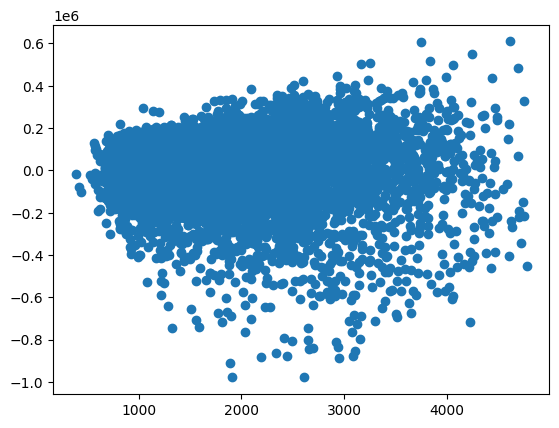

In [122]:
# Create net predicted ridge variable and build scatter plot for sqft_living column
ridge_pred_net = pd.concat([pd.DataFrame(ridge_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_pred_net['res'] = ridge_pred_net['pred'] - ridge_pred_net['price']
plt.scatter(X_test['sqft_living'],ridge_pred_net['res'])

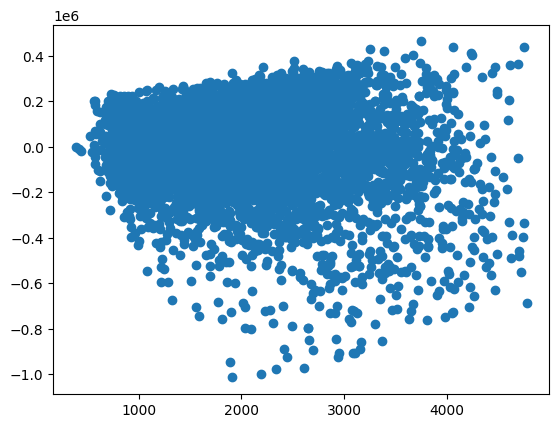

In [123]:
# Create net predicted elastic net variable and build scatter plot for sqft_living column
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']
plt.scatter(X_test['sqft_living'],elastic_net_pred['res'])

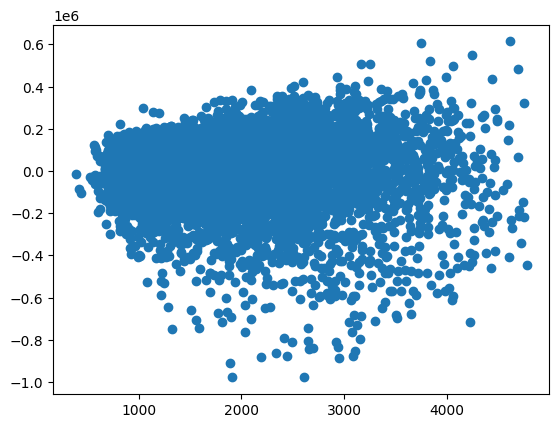

In [124]:
# Create net predicted lasso variable and build scatter plot for sqft_living column
lasso_pred_net = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
lasso_pred_net['res'] = lasso_pred_net['pred'] - lasso_pred_net['price']
plt.scatter(X_test['sqft_living'],lasso_pred_net['res'])

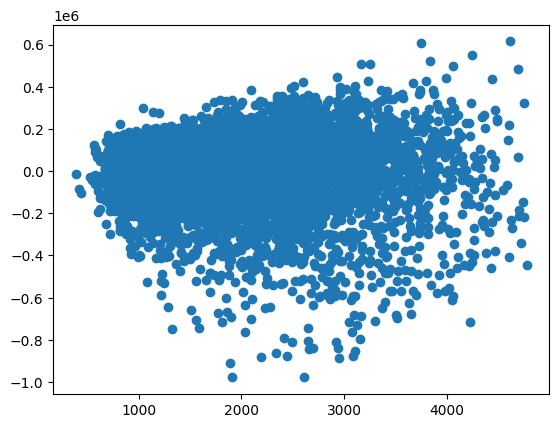

In [125]:
# Create net predicted linear variable and build scatter plot for sqft_living column
linear_pred_net = pd.concat([pd.DataFrame(pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
linear_pred_net['res'] = linear_pred_net['pred'] - linear_pred_net['price']
plt.scatter(X_test['sqft_living'],linear_pred_net['res'])

**Q. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.**
You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.**
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.**

A. Before building the model to predict the price of a house, it was essential to clean the data and remove any outliers. Since there were no missing or NaN values in the dataset, there wasn't a need to impute any values. However, multiple outliers were present based on bar plots for columns 'price', 'sqft_living', 'bedrooms', 'floors', 'grade', and 'sqft_lot'. I took the following approach to remove the outliers from these columns
- Created function remove_outliers_zscore with a threshold value of 3 to remove any outliers from the price column
- Followed a similar approach to remove any outliers from the sqft_living, bedrooms and grade columns
- Post which I dropped 'any' null values to ensure there are no missing values in the dataset

Overall, I created all models - including OLS, Linear regression, LASSO, Ridge and Elastic net - to assess which model performs the best in predicting the price of a house. I created an OLS regression model using the columns 'bedrooms', 'sqft_living' and 'floors' because these factors impact the house price more. Creating a probability plot and an influence plot using the results from the OLS regression model gave a clear understanding of the presence of additional outliers with a high impact and the behavior of data. Using these plots, I removed more outliers, in this case, index number 6377.

To improve the efficacy of my OLS regression model, I performed some feature engineering by creating dummy variables on categorical values such as 'view', 'grade' and 'condition'. Post that, I incorporated each of the variables mentioned above into my OLS equation to understand the impact and potential for improvement. Based on the results obtained, it was clear that the model with information about the quality of materials used and craft, i.e., 'grade', improved the model relatively better. 

Furthermore, I resampled my dataset on a two-day interval with aggregate values of critical attributes to further improve my OLS regression model. I attained an R-squared of 0.748 over the original value of 0.430, indicating that the above methods enhanced the efficiency by ~30%.

Ultimately, I segregated all my key attributes as categorical or numerical features to create train and test variables to apply regression and develop linear, LASSO, ridge and elastic net regression models to assess which model works best based on the provided dataset.
Based on the results, the Linear regression model best predicts the house price compared to others. *[rationale explained below]*

**Q. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?**

A. To assess the model that can accurately predict a house's price, I considered various factors to compare the models created, such as R-squared values, Mean Squared Error (MSE) and Scatterplots. 
After resampling my dataset, the OLS regression model had an R-squared value of 0.748, indicating a 74.8% accuracy in predicting house prices. However, since we do not have the R-squared values for other regression models, comparing the mean squared error (MSE) would be a better parameter. The MSE results for each model are as follows.
OLS Regression Model - 190455.03815980462
Linear Regression Model - 176404.7387620657
Ridge Regression Model - 176419.81510329718
LASSO Regression Model - 176404.79320958263
Elastic Net Regression Model - 188358.79392816068

The results mentioned above indicate that the OLS regression model has the highest MSE value and performs the worst in predicting the price of a house as compared to other models. Another observation we can make is that though linear and LASSO regression has an almost similar MSE, they perform much better than others. Pressure testing further, we can conclude that the linear regression model will be more accurate in predicting the price of the house, though not that much over LASSO,  given the attributes 'number of bedrooms (bedrooms)', 'living area in sqft (sqft_living)', 'number of floors (floors)' and 'quality of materials and workmanship used to build the house (grade)' as it's mean squared error is lower comparatively.

To validate our findings, I looked at the scatterplot for 'sqft_living'; it is clear that the models have improved over the original model. The new scatterplots are less dense but more condensed post all the cleaning and feature engineering techniques. Although not that different, the scatter plot for Linear and LASSO regression models are slightly better due to the lower mean squared errors of these. 

Using the parameters mentioned above, we can conclude that the Linear Regression model would be most effective in predicting the house price for the given dataset.

**Q. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?**

A. A model that can predict the price of a house can be highly beneficial for real estate agents and even potential buyers. Using the dataset provided - which contained values such as the price of a house based on attributes such as number of bedrooms and bathrooms, living and lot area in sqft, number of floors, view and condition and grade of the house, year the house was built and renovated etc. - we developed a predictive regression which can forecast the price of the house using these metrics. To create our regression model, we streamlined certain factors such as the number of bedrooms, living area in sqft, number of floors and quality of materials used and quality as these attributes tend to have a higher impact on house price. Since multiple regression models can predict house prices, we wanted to choose the best model; we developed numerous models initially to assess their performance. Based on the results, the Linear regression model performs relatively better than others in predicting house prices. Our model has yielded valuable insights into the housing market, giving us a deeper understanding of the factors influencing house prices in King City. 

Based on my understanding, the main drivers impacting the house prices in King City are 
1) Number of bedrooms within the house
2) Living area of the house in sqft
3) Number of floors in the house
4) Grade of materials used and quality of artistry to build the house

Using the coefficients from the OLS regression model, we can deduce that number of floors has the most significant impact on house price, with a coefficient of 9.16e+04 (91600), followed by living area in sqft with a coefficient of 390.8431.

By extrapolating values from critical attributes in the given dataset, the Linear regression model can most accurately predict the price of houses.